<a href="https://colab.research.google.com/github/adityapatil4141/Health-Insurance-Cross-Sell-Prediction/blob/main/Health_Insurance_Cross_Sell_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 - Aditya Patil **

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/adityapatil4141/Health-Insurance-Cross-Sell-Prediction

# **Problem Statement**


** The task is to develop a machine learning model that predicts whether a policyholder from the past year would be interested in obtaining vehicle insurance from the company. The dataset includes information about demographics (gender, age, region code type), details about the vehicle (vehicle age, damage), and policy-related details (premium, sourcing channel).**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [518]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)
colors = sns.color_palette(palette='Set1')

### Dataset Loading

In [519]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [520]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/work files /Health Insurance Cross Sell Prediction/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv")

### Dataset First View

In [521]:
# Dataset First Look
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Dataset Rows & Columns count

In [522]:
# Dataset Rows & Columns count
df.shape

(381109, 12)

### Dataset Information

In [523]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [524]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [525]:
# Missing Values/Null Values Count
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

<Axes: >

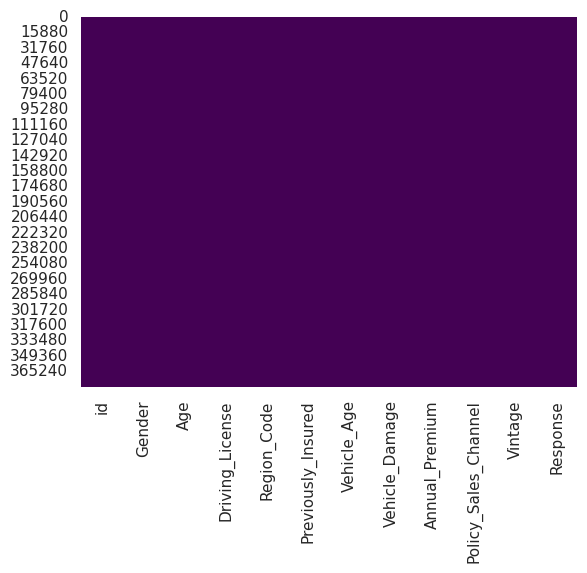

In [526]:
# Visualizing the missing values
sns.heatmap(df.isnull(),cmap='viridis',cbar=False)

### What did you know about your dataset?

--> There are total 381109 rows and 12 columns.

--> There are no null values in the dataset.

--> There are no duplicate values in the dataset.


## ***2. Understanding Your Variables***

In [527]:
# Dataset Columns
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [528]:
# Dataset Describe
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [529]:
# Check Unique Values for each variable.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [530]:
# Write your code to make your dataset analysis ready.
df = df.drop(columns='id')

In [531]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### What all manipulations have you done and insights you found?

As there are no null value or no duplicate values there is no need to do any extra things.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [532]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


<ipython-input-533-c87f76e2ef70>:5: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.countplot(data=df,x=df['Gender'],palette=colors,hue='Gender')


<Axes: xlabel='Gender', ylabel='count'>

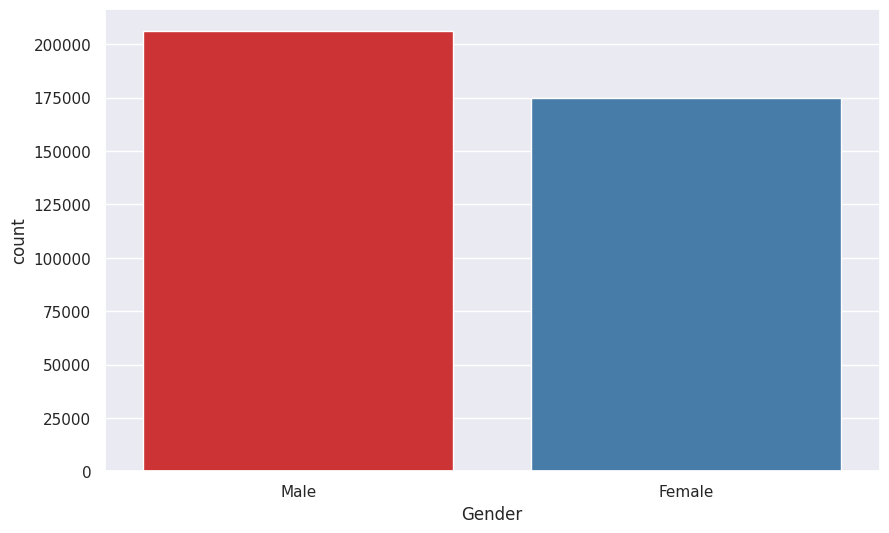

In [533]:
# Chart - 1 visualization code
# Countplot:
# How many genders and their count:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x=df['Gender'],palette=colors,hue='Gender')

In [534]:
# Numeric presentation of same:
df['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

##### 1. Why did you pick the specific chart?

Countplot helps to count values in a column.

##### 2. What is/are the insight(s) found from the chart?

Number of males are more compared to female.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This shows us that most policyholders are male.

#### Chart - 2

In [535]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


<ipython-input-536-6775ca05fd8c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=df['Age'],palette=colors)
<ipython-input-536-6775ca05fd8c>:5: UserWarning: 
The palette list has fewer values (9) than needed (66) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df,x=df['Age'],palette=colors)


<Axes: xlabel='Age', ylabel='count'>

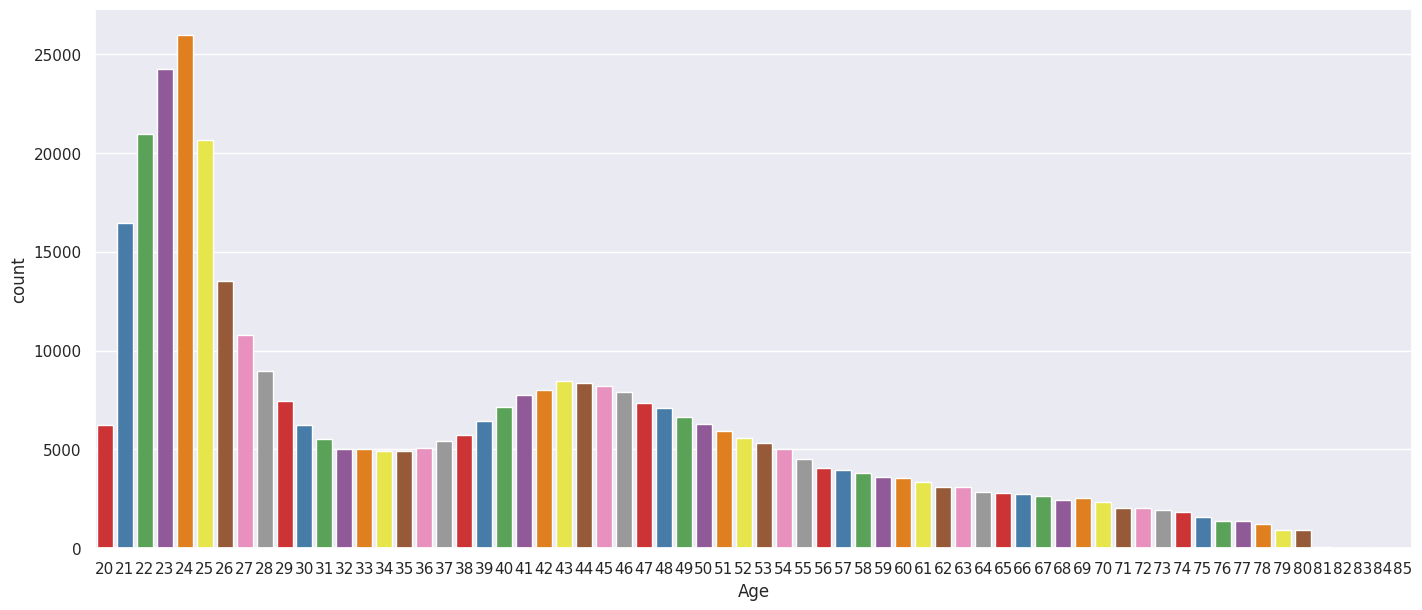

In [536]:
# Chart - 2 visualization code
# Countplot:
# Age distribution:
plt.figure(figsize=(17,7))
sns.countplot(data=df,x=df['Age'],palette=colors)

##### 1. Why did you pick the specific chart?

Countplot helps to count values in a column.

##### 2. What is/are the insight(s) found from the chart?

Most policy holders lies in age group of 21-27 and 40-48

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By getting information about customers age we can target them easily.

#### Chart - 3

<ipython-input-537-e9a7bdb3c764>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Driving_License',palette=colors)
<ipython-input-537-e9a7bdb3c764>:5: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.countplot(data=df,x='Driving_License',palette=colors)


<Axes: xlabel='Driving_License', ylabel='count'>

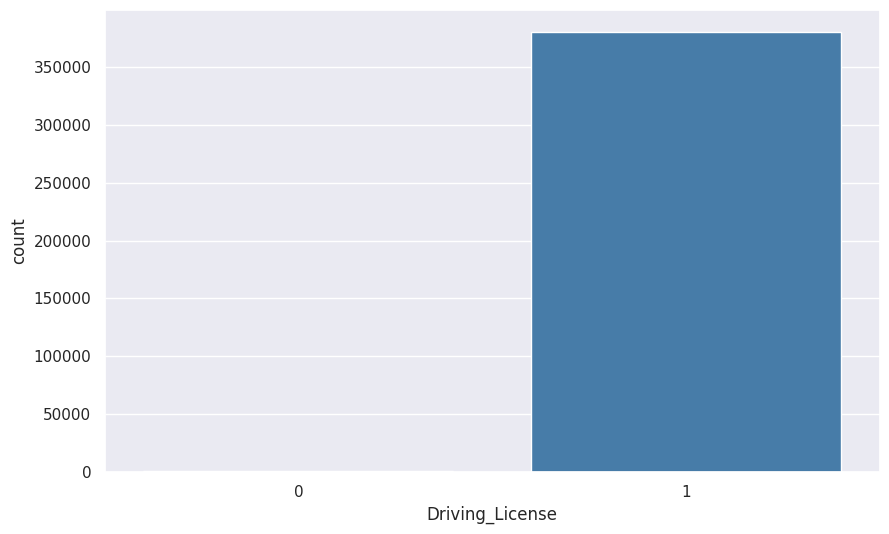

In [537]:
# Chart - 3 visualization code
# Countplot:
# How many peoples have driving license:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Driving_License',palette=colors)

In [538]:
# Numerical presentation of same:
df['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

In [539]:
dl_count = df['Driving_License'].value_counts()
dl_count

1    380297
0       812
Name: Driving_License, dtype: int64

([<matplotlib.patches.Wedge at 0x7cf1c10dd9f0>,
 [Text(-1.0999753580016838, 0.007362865547323239, '1'),
  Text(1.099975357920899, -0.007362877616127189, '0')],
 [Text(-0.5999865589100092, 0.00401610848035813, '99.79'),
  Text(0.5999865588659449, -0.004016115063342102, '0.21')])

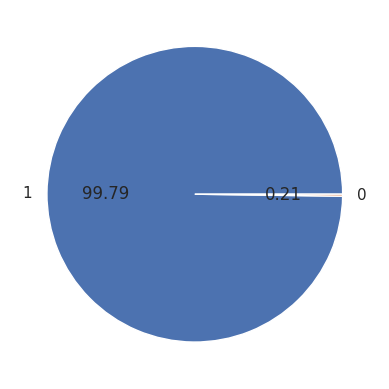

In [540]:
# Pie chart to get how many percent of people has driving license and how many do not have a friving license:
plt.pie(dl_count,autopct='%.2f',labels=dl_count.index)

##### 1. Why did you pick the specific chart?

Countplot helps to count values in a column.

##### 2. What is/are the insight(s) found from the chart?

Most people have driving license, people without driving license are very few.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

probability is people without driving license may not have a vehicle and so they may not be interested in Policy.

#### Chart - 4

In [541]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


<ipython-input-542-232b6c0c16ae>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=df['Previously_Insured'],palette=colors)
<ipython-input-542-232b6c0c16ae>:4: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.countplot(data=df,x=df['Previously_Insured'],palette=colors)


<Axes: xlabel='Previously_Insured', ylabel='count'>

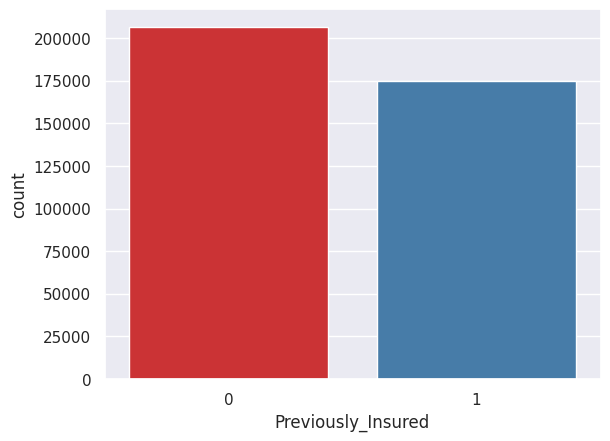

In [542]:
# Chart - 4 visualization code
# Countplot:
# How may people are previously insured
sns.countplot(data=df,x=df['Previously_Insured'],palette=colors)

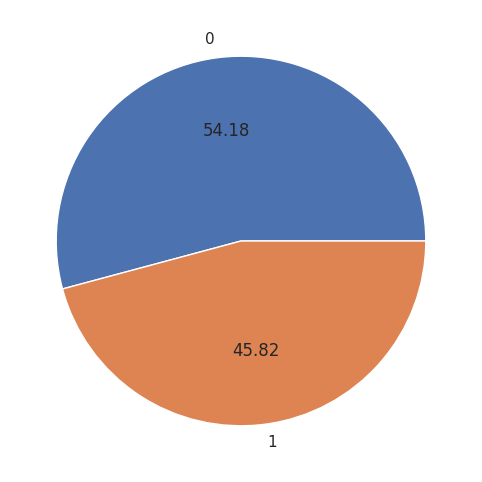

In [543]:
plt.figure(figsize=(10,6))
pi_count = df['Previously_Insured'].value_counts()
plt.pie(pi_count,autopct='%.2f',labels=pi_count.index)
plt.show()

##### 1. Why did you pick the specific chart?

Pie chart can show how many percent of people are insure and not insured

##### 2. What is/are the insight(s) found from the chart?

54.18 % people are not insured and only 45.82 % people are insured.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

<ipython-input-544-902639c46112>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=df['Vehicle_Age'],palette=colors)
<ipython-input-544-902639c46112>:5: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.countplot(data=df,x=df['Vehicle_Age'],palette=colors)


<Axes: xlabel='Vehicle_Age', ylabel='count'>

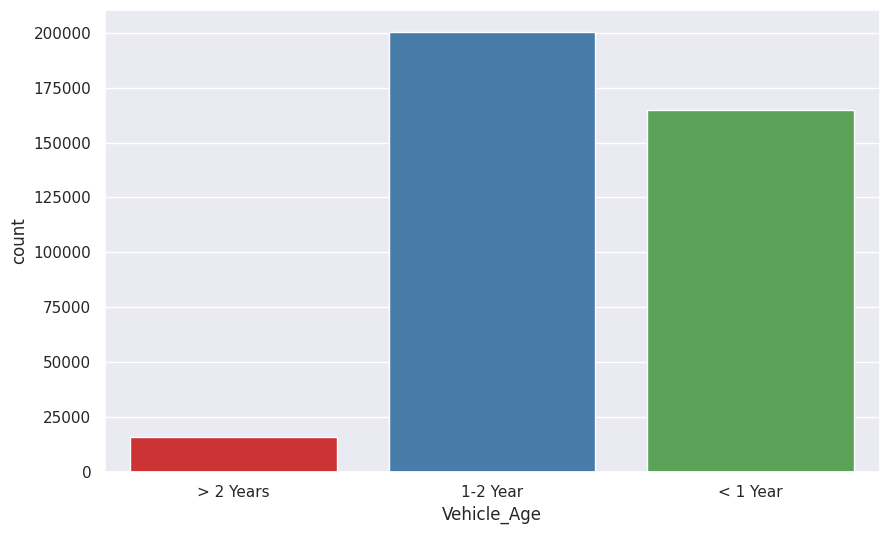

In [544]:
# Chart - 5 visualization code
# Countplot:
# See count of vehicle age:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x=df['Vehicle_Age'],palette=colors)

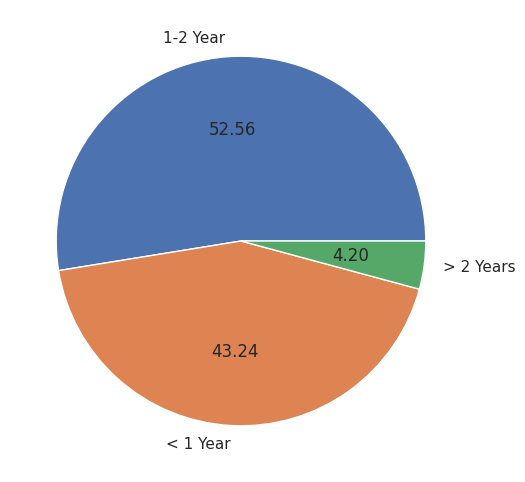

In [545]:
v_age_count = df['Vehicle_Age'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(v_age_count,autopct='%.2f',labels=v_age_count.index)
plt.show()

##### 1. Why did you pick the specific chart?

check percentage and count of vehicle age.

##### 2. What is/are the insight(s) found from the chart?

52.56% vehicle are of age 1-2 years and 43.24 % of vehicles are less than a year old, whereas 4.20% vehicles are above 2 years age.

#### Chart - 6

<ipython-input-546-8add3d5d6ac6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=df['Vehicle_Damage'],palette=colors)
<ipython-input-546-8add3d5d6ac6>:5: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.countplot(data=df,x=df['Vehicle_Damage'],palette=colors)


<Axes: xlabel='Vehicle_Damage', ylabel='count'>

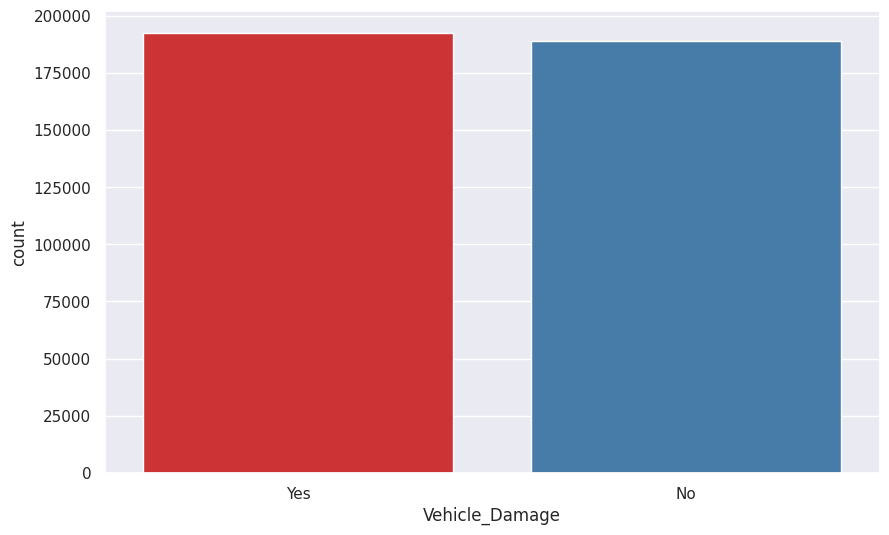

In [546]:
# Chart - 6 visualization code
# Countplot:
# How many vehicles are damaged:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x=df['Vehicle_Damage'],palette=colors)

([<matplotlib.patches.Wedge at 0x7cf1c0fecb80>,
 [Text(-0.01685150167390648, 1.0998709137400327, 'Yes'),
  Text(0.0168515016739061, -1.0998709137400327, 'No')],
 [Text(-0.00919172818576717, 0.5999295893127451, '50.49'),
  Text(0.009191728185766962, -0.5999295893127451, '49.51')])

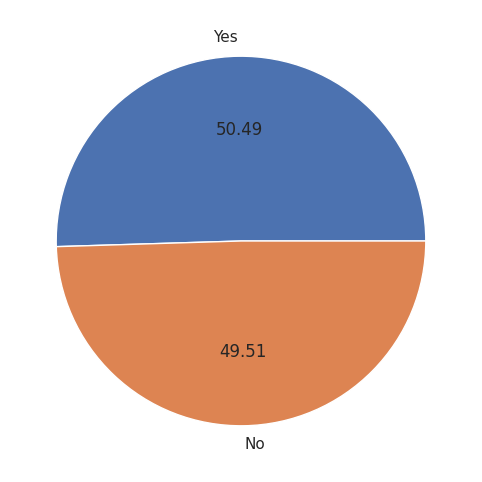

In [547]:
v_damage = df['Vehicle_Damage'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(v_damage,autopct='%.2f',labels=v_damage.index)


##### 1. Why did you pick the specific chart?

To see how many vehicles were damaged.

##### 2. What is/are the insight(s) found from the chart?

50.49 % vehicles are damaged and 49.51 % vehicles are not damaged.

#### Chart - 7

<Axes: xlabel='Response', ylabel='count'>

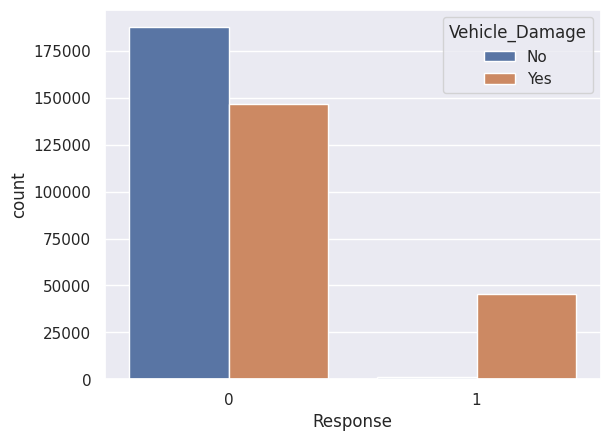

In [548]:
# Countplot:
# Peoples response on basis of vehicle damage:
sns.countplot(data=df,x=df['Response'], hue='Vehicle_Damage')

##### 1. Why did you pick the specific chart?

Countplot helps to count values in a column.

##### 2. What is/are the insight(s) found from the chart?

We can see that People with no vehicle damage are not interested in getting vehicle insurance followed by people with vehicle damage are also not interested in insurance as compared to people interested in insurance with vehicle damage.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This will help to understand what type of people are interested in buying insurance.

#### Chart - 8

<Axes: xlabel='Previously_Insured', ylabel='count'>

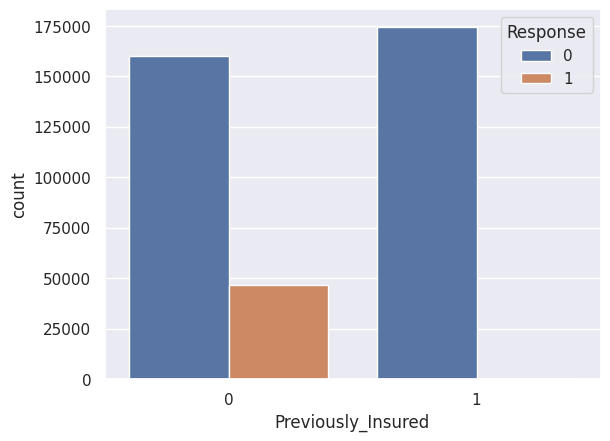

In [549]:
# Chart - 8 visualization code
df.head()
# Perviously insured peoples and their response:
sns.countplot(data=df,x= 'Previously_Insured',hue='Response')

##### 2. What is/are the insight(s) found from the chart?

Maximum are those peoples who are previously insured but are not interested in vehicle insurance, followed by no. of peoples who re not previously insured and anre not interested in vehicle insurance, There are few people who are not previously insured but are interested in vehicle insurance.

#### Chart - 9

In [550]:
# Chart - 9 visualization code
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [551]:
# Top 10 region code that have highest no. of interested people
top_regions =df.groupby(df['Region_Code'])['Response'].sum().sort_values(ascending=False).reset_index().head(10)
top_regions

,Region_Code,Response
0,28.0,19917
1,8.0,3257
2,41.0,2224
3,46.0,2032
4,29.0,1365
5,3.0,1181
6,11.0,1041
7,15.0,958
8,30.0,900
9,35.0,865


<Axes: xlabel='Region_Code', ylabel='Response'>

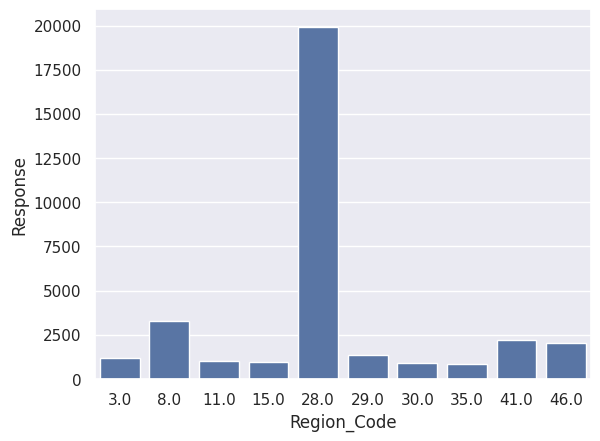

In [552]:
sns.barplot(data=top_regions,x='Region_Code',y='Response')

##### 2. What is/are the insight(s) found from the chart?

Region_code 28 has highest no. of interested people in vehicle insurance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By this visualization we can easily descide on which region to focus.

#### Chart - 10

In [553]:
# Chart - 10 visualization code
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [554]:
# Which age group of people are interested in vehicle insurance
Top_Age = df.groupby(df['Age'])['Response'].sum().sort_values(ascending=False).reset_index().head(10)
Top_Age

,Age,Response
0,44,1811
1,43,1805
2,45,1775
3,46,1707
4,42,1651
5,41,1615
6,47,1607
7,40,1550
8,48,1500
9,39,1375


<Axes: xlabel='Age', ylabel='Response'>

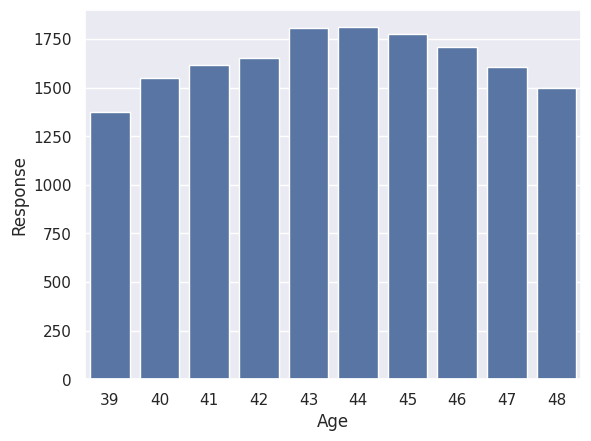

In [555]:
sns.barplot(data=Top_Age,x='Age',y='Response')

##### 1. Why did you pick the specific chart?

Barplot helps to compare values

##### 2. What is/are the insight(s) found from the chart?

People of age 44 are most interesed in vehicle insurance followed by people of age 43, 45,46. We can conclude that people in their 40's are more tend to buy vehicle insurance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can conclude that people in their 40's are more tend to buy vehicle insurance.

#### Chart - 11

In [556]:
# Chart - 11 visualization code
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [557]:
# Which gender is more interested in vehicle insurance
gender_resp = df.groupby(df['Gender'])['Response'].sum().reset_index()
gender_resp

,Gender,Response
0,Female,18185
1,Male,28525


<Axes: xlabel='Gender', ylabel='Response'>

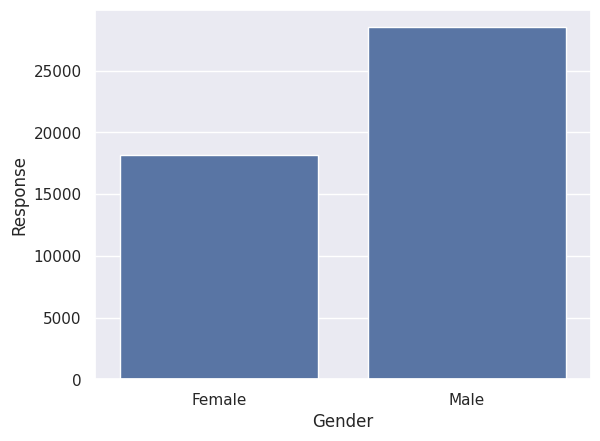

In [558]:
sns.barplot(data=gender_resp,x='Gender',y='Response')

##### 1. Why did you pick the specific chart?

With barplot we can see comparison more accurately

##### 2. What is/are the insight(s) found from the chart?

Males are more iterested to buy vehicle insurance compared to female

#### Chart - 12

In [559]:
# Chart - 12 visualization code
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [560]:
# Vehicle age and interested people:
vehicl_age_wise_intereset = df.groupby(df['Vehicle_Age'])['Response'].sum().reset_index()
vehicl_age_wise_intereset

,Vehicle_Age,Response
0,1-2 Year,34806
1,< 1 Year,7202
2,> 2 Years,4702


<Axes: xlabel='Vehicle_Age', ylabel='Response'>

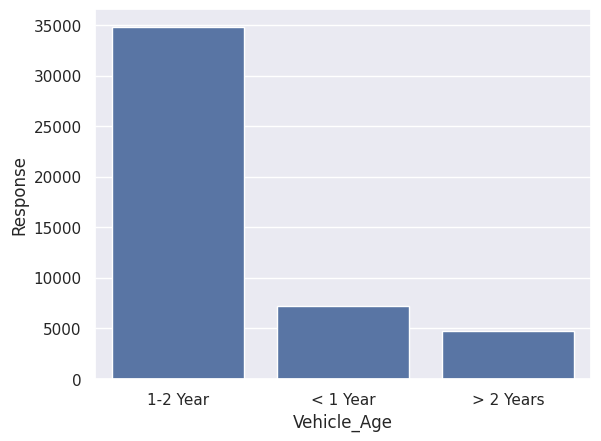

In [561]:
sns.barplot(data=vehicl_age_wise_intereset,x='Vehicle_Age',y='Response')

##### 2. What is/are the insight(s) found from the chart?

People whose vehicle age is between 1-2 year are more interested in vehicle insurance

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [562]:
# Chart - 13 visualization code
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [563]:
# Interested people and their vehicle damage:
damage_vehicel_response = df.groupby(df['Vehicle_Damage'])['Response'].sum().reset_index()
damage_vehicel_response

,Vehicle_Damage,Response
0,No,982
1,Yes,45728


<Axes: xlabel='Vehicle_Damage', ylabel='Response'>

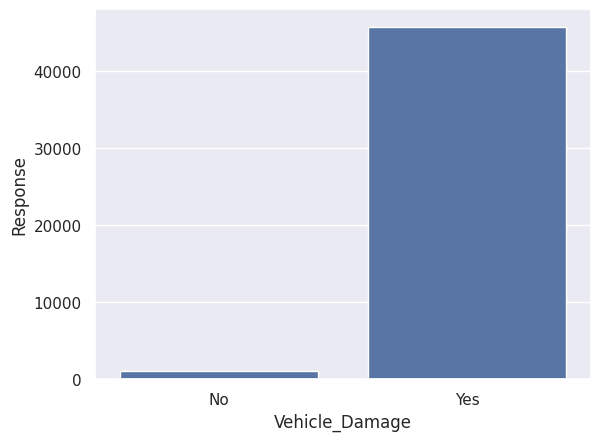

In [564]:
sns.barplot(data=damage_vehicel_response,x='Vehicle_Damage',y='Response')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<ipython-input-565-80dda8770490>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

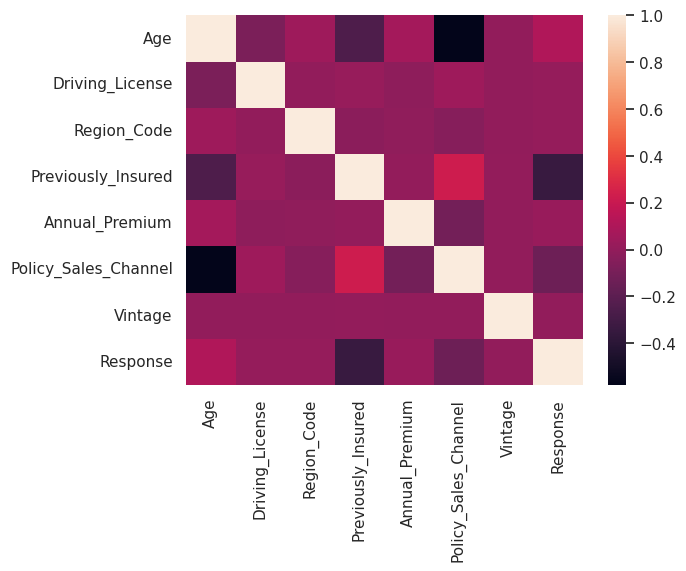

In [565]:
# Correlation Heatmap visualization code
sns.heatmap(df.corr())

#### Chart - 15 - Pair Plot

In [566]:
# Pair Plot visualization code
# sns.pairplot(df,palette='viridis')

#### Chart - 16

In [567]:
df['Policy_Sales_Channel'].unique()

array([ 26., 152., 160., 124.,  14.,  13.,  30., 156., 163., 157., 122.,
        19.,  22.,  15., 154.,  16.,  52., 155.,  11., 151., 125.,  25.,
        61.,   1.,  86.,  31., 150.,  23.,  60.,  21., 121.,   3., 139.,
        12.,  29.,  55.,   7.,  47., 127., 153.,  78., 158.,  89.,  32.,
         8.,  10., 120.,  65.,   4.,  42.,  83., 136.,  24.,  18.,  56.,
        48., 106.,  54.,  93., 116.,  91.,  45.,   9., 145., 147.,  44.,
       109.,  37., 140., 107., 128., 131., 114., 118., 159., 119., 105.,
       135.,  62., 138., 129.,  88.,  92., 111., 113.,  73.,  36.,  28.,
        35.,  59.,  53., 148., 133., 108.,  64.,  39.,  94., 132.,  46.,
        81., 103.,  90.,  51.,  27., 146.,  63.,  96.,  40.,  66., 100.,
        95., 123.,  98.,  75.,  69., 130., 134.,  49.,  97.,  38.,  17.,
       110.,  80.,  71., 117.,  58.,  20.,  76., 104.,  87.,  84., 137.,
       126.,  68.,  67., 101., 115.,  57.,  82.,  79., 112.,  99.,  70.,
         2.,  34.,  33.,  74., 102., 149.,  43.,   

In [568]:
# Which Policy_Sales_Channel has highest positive response:
channel_resp = df.groupby(df['Policy_Sales_Channel'])['Response'].sum().sort_values(ascending=False).reset_index().head(10)
channel_resp

,Policy_Sales_Channel,Response
0,26.0,15891
1,124.0,13996
2,152.0,3858
3,156.0,2297
4,157.0,1794
5,122.0,1720
6,154.0,1474
7,163.0,880
8,160.0,475
9,155.0,395


<Axes: xlabel='Policy_Sales_Channel', ylabel='Response'>

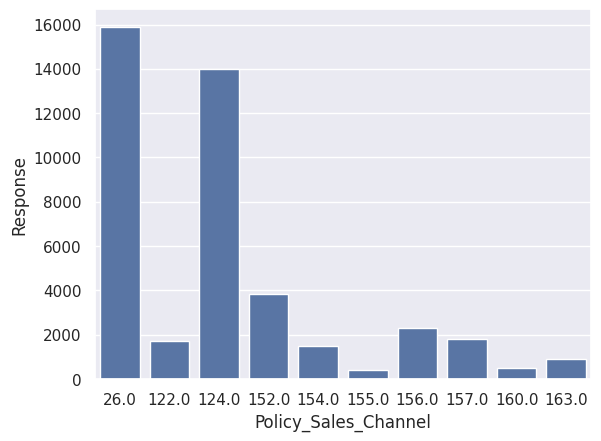

In [569]:
sns.barplot(data=channel_resp,x='Policy_Sales_Channel',y='Response')

##### 2. What is/are the insight(s) found from the chart?

Policy_Sales_Channel 26.0 has the highest no. of people who are interested in vehicle insurance followed by channel 124.0,152.0 and others

## ***5. EDA***

In [570]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [571]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [572]:
df['Previously_Insured'].unique()

array([0, 1])

In [573]:
from sklearn.preprocessing import OneHotEncoder
le = OneHotEncoder(drop='first',sparse=False,dtype='int')
df[['Gender','Vehicle_Damage']] = le.fit_transform(df[['Gender','Vehicle_Damage']])
df['Gender'].unique()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([1, 0])

In [576]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Vehicle_Age']=le.fit_transform(df['Vehicle_Age'])
df["Vehicle_Age"].unique()

array([2, 0, 1])

In [577]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


In [578]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  int64  
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  int64  
 6   Vehicle_Damage        381109 non-null  int64  
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 32.0 MB


## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***